In [168]:
import mlrose_hiive as mlrose
import numpy as np
import argparse
import logging
import os
import data
import random as rand
from sklearn import preprocessing
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [202]:
df = pd.read_csv (r'./wine.csv')
dataset ='Wine'

y = df.pop('class')
X_scaled = preprocessing.scale(df)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

n_features = X_train.shape[1]

In [203]:
rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.25, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)

rhcmodel.fit(X_train,y_train)

NeuralNetwork(activation='tanh', clip_max=5, curve=True, early_stopping=True,
              hidden_nodes=[5], learning_rate=0.25, max_attempts=1000,
              max_iters=4000, random_state=42)

In [204]:
y_test_pred = rhcmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.813076923076923

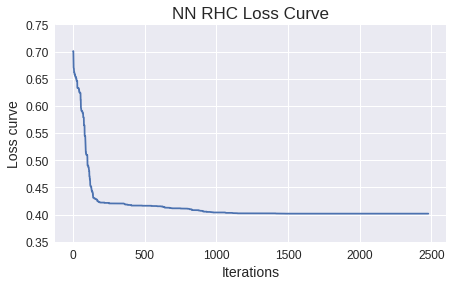

In [215]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(7, 4, forward=True)
plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve)

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('NN RHC Loss Curve', fontsize = 17, y = 1)
# plt.legend()
plt.ylim(0.35,0.75)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [173]:
samodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)

samodel.fit(X_train,y_train)


NeuralNetwork(activation='tanh', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[5],
              learning_rate=0.04, max_attempts=25, max_iters=4000,
              random_state=42,
              schedule=ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001))

In [174]:
y_test_pred = samodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.79

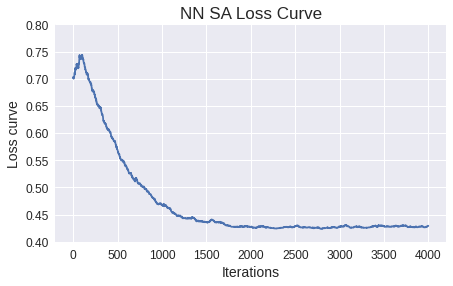

In [216]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(7, 4, forward=True)
#gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve)
#plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
#plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('NN SA Loss Curve', fontsize = 17, y = 1)
# plt.legend()
plt.ylim(0.4,0.8)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [176]:
gamodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 500, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 500, pop_size=200,random_state=42,curve =True)
gamodel.fit(X_train,y_train)

NeuralNetwork(activation='tanh', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[5],
              learning_rate=0.0001, max_attempts=500, max_iters=500,
              mutation_prob=0.025, random_state=42)

In [177]:
y_test_pred = gamodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.816923076923077

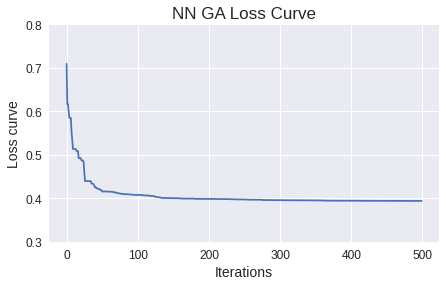

In [218]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(7, 4, forward=True)
#gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
#plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve, label = 'SA')
plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve)
#plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('NN GA Loss Curve', fontsize = 17, y = 1)
# plt.legend()
plt.ylim(0.3,0.8)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [194]:
gdmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.00004, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
gdmodel.fit(X_train,y_train)

NeuralNetwork(activation='tanh', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[5],
              learning_rate=4e-05, max_attempts=25, max_iters=4000,
              random_state=42)

In [222]:
y_test_pred = gdmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7930769230769231

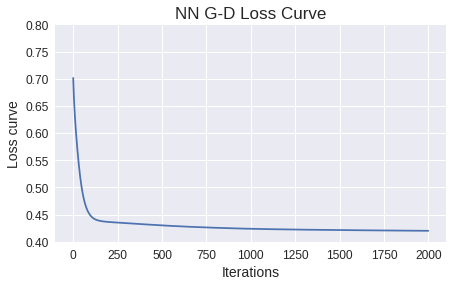

In [221]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(7,4, forward=True)
gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
#plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve, label = 'SA')
#plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness)

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('NN G-D Loss Curve', fontsize = 17, y = 1)
# plt.legend()
plt.ylim(0.4,0.8)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [182]:
#RHC HP - Learning rate plot
rhc_lr = [0.001,0.01,0.025,2.0,10]
rhc_accuracy = []
for lr in rhc_lr:
    rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=lr, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)
    rhcmodel.fit(X_train,y_train)
    y_test_pred = rhcmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    rhc_accuracy.append(accuracy)


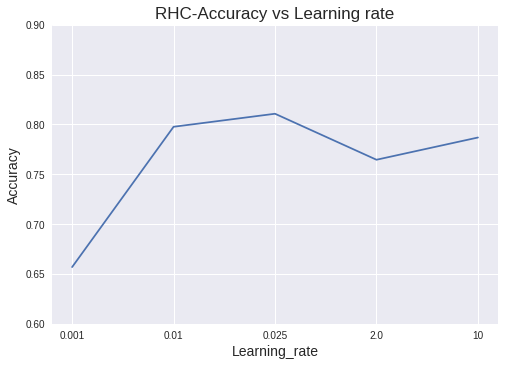

In [225]:
#plot curve for learning_rate
rhc_learning_rate_range = ['0.001','0.01','0.025','2.0','10']
plt.style.use('seaborn')
plt.plot(rhc_learning_rate_range, rhc_accuracy)
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Learning_rate', fontsize = 14)
plt.title('RHC-Accuracy vs Learning rate', fontsize = 17, y = 1)
plt.ylim(0.6,0.9)
plt.show()

In [184]:
#SA HP - Temperature plot
sa_init_temp = [1,10,100,1000]
sa_accuracy = []
for temp in sa_init_temp:
    samodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=temp, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
    samodel.fit(X_train,y_train)
    y_test_pred = samodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    sa_accuracy.append(accuracy)


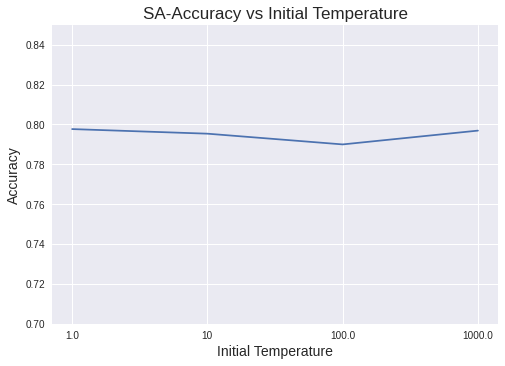

In [232]:
#plot  curve for learning_rate
sa_init_temp_range = ['1.0','10','100.0','1000.0']
plt.style.use('seaborn')
plt.plot(sa_init_temp_range, sa_accuracy)
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Initial Temperature', fontsize = 14)
plt.title('SA-Accuracy vs Initial Temperature', fontsize = 17, y = 1)
plt.ylim(0.7,0.85)
plt.show()

In [195]:
#GA HP - Population size plot
ga_pop_size = [10,100,200,500]
ga_accuracy = []
for pop in ga_pop_size:
    gamodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 500, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 200, pop_size=pop,random_state=42,curve =True)
    gamodel.fit(X_train,y_train)
    y_test_pred = gamodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    ga_accuracy.append(accuracy)


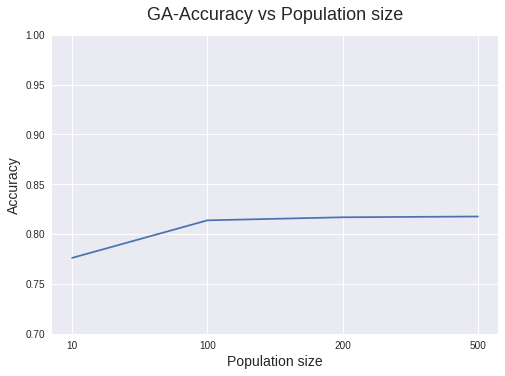

In [229]:
#plot curve for Population size
#ga_accuracy.append(0.68125)
ga_init_temp_range = ['10','100','200','500']
plt.style.use('seaborn')
plt.plot(ga_init_temp_range, ga_accuracy)
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Population size', fontsize = 14)
plt.title('GA-Accuracy vs Population size', fontsize = 18, y = 1.03)
plt.ylim(0.70,1)
plt.show()

In [197]:
#GD HP - Population size plot
gd_learning_size = [0.000001,0.000002,0.000005,0.00004,0.0001,0.001,0.01,0.1,1]
gd_accuracy = []
for gd_lr in gd_learning_size:
    gdmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=gd_lr, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
    gdmodel.fit(X_train,y_train)
    y_test_pred = gdmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    gd_accuracy.append(accuracy)


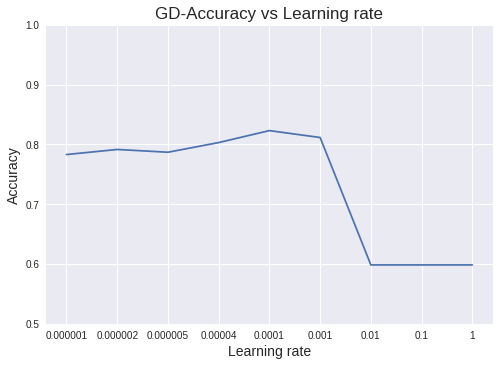

In [227]:
#plot validation curve for learning_rate
gd_lr_range = ['0.000001','0.000002','0.000005','0.00004','0.0001','0.001','0.01','0.1','1']
plt.style.use('seaborn')
plt.plot(gd_lr_range, gd_accuracy)
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Learning rate', fontsize = 14)
plt.title('GD-Accuracy vs Learning rate', fontsize = 17, y = 1)
plt.ylim(0.50,1)
plt.show()

In [199]:
#best models time metric
time_list = []
start = time.time()
rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.25, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)

rhcmodel.fit(X_train,y_train)
y_test_pred = rhcmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)


start = time.time()
samodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh',
                                        algorithm ='simulated_annealing', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)

samodel.fit(X_train,y_train)

y_test_pred = samodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)


start = time.time()
gamodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 500, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 500, pop_size=200,random_state=42,curve =True)
gamodel.fit(X_train,y_train)

y_test_pred = gamodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)

start = time.time()
gdmodel = mlrose.NeuralNetwork(hidden_nodes = [5], activation ='tanh', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 2000, bias = True, is_classifier = True, 
                                        learning_rate=0.00004, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
gdmodel.fit(X_train,y_train)

y_test_pred = gdmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)#0.000002
end = time.time()
time_list.append(end - start)



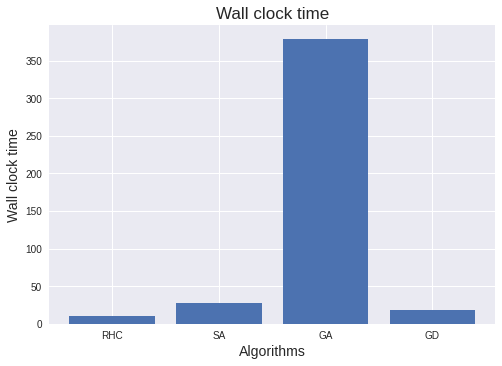

In [233]:
plt.bar(['RHC','SA','GA','GD'],time_list)
plt.ylabel('Wall clock time', fontsize = 14)
plt.xlabel('Algorithms', fontsize = 14)
plt.title('Wall clock time', fontsize = 17, y = 1)
plt.show()

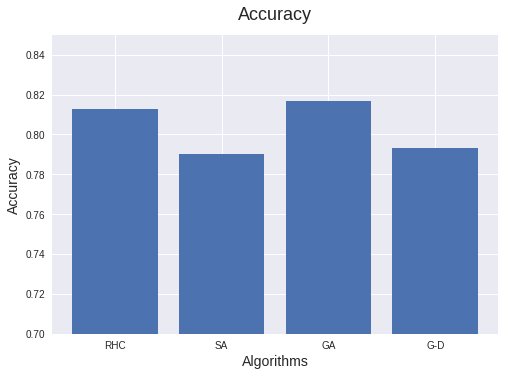

In [234]:
test_accuracy = [0.813,0.79,0.8168,0.793]
plt.bar(['RHC','SA','GA','G-D'],test_accuracy)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Algorithms', fontsize = 14)
plt.title('Accuracy', fontsize = 18, y = 1.03)
plt.ylim(0.7,0.85)
plt.show()